### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.

Баллы даются за выполнение отдельных пунктов (Максимальное количество баллов за эту Л.Р. - 5)

Задачи в рамках одного раздела рекомендуется решать в том порядке, в котором они даны в задании.

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через lms. Вы прикрепляете **ССЫЛКУ НА ПУБЛИЧНЫЙ РЕПОЗИТОРИЙ**, где выполнено ваше задание.


Приготовьтесь, потому что на лекциях и семинарах мы уже прошли через джунгли теории, оттачивая наши навыки в мастерстве оптимизации функционалов. Мы погружались в глубины градиентного спуска, изучая его в каждом возможном амплуа — от классического полного градиента до беспощадного стохастического градиента, не забывая про метод с импульсом, который как боксерский удар прорывается сквозь проблемы оптимизации.

Теперь же перед вами стоит вызов, который не для слабонервных. Ваша миссия, если вы, конечно, осмелитесь ее принять, — взять в арсенал четыре разнообразных вида градиентного спуска и смастерить из них инструмент, способный расправиться с любой задачей. Вам предстоит создать собственную версию линейной регрессии, такую, что даже самые опытные аналитики данных будут смотреть на нее с завистью. Испытайте на реальных данных весь арсенал вашего градиентного спуска, сравните, какой из них выходит на арену оптимизации как несокрушимый чемпион.

Это задание не для тех, кто привык стоять в сторонке. Это ваш момент славы, ваш шанс выйти на арену, где вашим оружием будет код, а противниками — самые коварные задачи машинного обучения. Покажите, на что вы способны, и пусть ваш код станет легендой!

@GPT-4

## Задание 1. Реализация градиентного спуска (1.75 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое размышление № 1

Ключевая характеристика антиградиента заключается в том, что он направлен к самому быстрому уменьшению значения функции в конкретной точке. Исходя из этого, разумным подходом будет начать движение с определенной точки, переместиться в направлении антиградиента, затем вновь вычислить антиградиент, совершить движение и продолжать таким образом. Давайте опишем этот процесс более формализованно.

Предположим, что $w_0$ – это исходный набор параметров (к примеру, набор из нулей или полученный из какого-либо случайного распределения). В этом случае простой градиентный спуск предполагает выполнение следующих действий до достижения сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое размышление № 2

### Задание 0.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

Давайте найдем градиент функции $Q(w)$ по $w$, используя матричное дифференцирование. Функция $Q(w)$ определена как:

$$
Q(w) = \frac{1}{\ell} (y - Xw)^T (y - Xw)
$$

где:
- $Q(w)$ — функция потерь,
- $\ell$ — количество наблюдений


- $y$ — вектор истинных значений,
- $X$ — матрица признаков,
- $w$ — вектор весов.

Градиент функции потерь $Q(w)$ по $w$ находится следующим образом:

1. Раскроем скобки в выражении для $Q(w)$:
   
$$
Q(w) = \frac{1}{\ell} (y^Ty - y^TXw - w^TX^Ty + w^TX^TXw)
$$

2. Заметим, что $y^TXw$ и $w^TX^Ty$ представляют собой скаляры и равны между собой. Тогда выражение упрощается до:
   
$$
Q(w) = \frac{1}{\ell} (y^Ty - 2y^TXw + w^TX^TXw)
$$

3. Теперь дифференцируем $Q(w)$ по $w$. При дифференцировании $y^Ty$ как константа относительно $w$ исчезает, а дифференциация оставшейся части дает:

$$
\nabla_w Q(w) = \frac{1}{\ell} (-2X^Ty + 2X^TXw)
$$

4. Упростим выражение, вынеся 2 за скобки:

$$
\nabla_w Q(w) = \frac{2}{\ell} (X^TXw - X^Ty)
$$

Таким образом, градиент функции потерь $Q(w)$ по вектору весов $w$ равен:

$$
\nabla_w Q(w) = \frac{2}{\ell} (X^TXw - X^Ty)
$$

Это выражение и есть искомый градиент.

### Задание 1.1. Родительский класс BaseDescent (0.25 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.25 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое размышление № 3

Конечно, давайте переформулируем и перепишем ваш текст для лучшего понимания.

В контексте задач машинного обучения, обычно функционал ошибки $Q(w)$ можно представить как среднее арифметическое отдельных ошибок на каждом элементе выборки:

$$
    Q(w) = \frac{1}{\ell} \sum_{i = 1}^{\ell} q_i(w),
$$

где каждая функция $q_i(w)$ отражает ошибку на i-ом объекте выборки.

Основная сложность применения метода градиентного спуска заключается в необходимости вычисления градиента по всей выборке на каждом шаге. Это может быть особенно затруднительно при работе с большими данными. Однако, для эффективного шага в направлении минимизации функции потерь, абсолютная точность градиента может быть не столь критична.

Мы можем приблизить градиент всей функции, используя среднее значение градиентов для случайно выбранной подвыборки объектов:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|} \sum_{i \in B} \nabla_{w} q_{i}(w_{k}),
$$

где $B$ является подмножеством выборки с случайно выбранными индексами.

Этот подход приводит нас к методу **стохастического градиентного спуска**, который значительно упрощает вычисления и ускоряет процесс обучения, особенно на больших данных.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.25 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое размышление № 4

В процессе оптимизации может случиться так, что направление наискорейшего спуска, определенное антиградиентом, будет резко колебаться от одного шага к другому. Это часто происходит, если функция потерь имеет вытянутые уровни, что приводит к тому, что градиент, всегда перпендикулярный этим линиям, меняет свое направление на противоположное при каждом шаге. Эти колебания могут серьезно замедлить сходимость оптимизационного процесса из-за постоянных "колебаний" в обратных направлениях. Чтобы сгладить эти осцилляции и ускорить процесс оптимизации, применяется метод усреднения градиентов из нескольких предыдущих шагов, тем самым снижая "шум" и выявляя общее предпочтительное направление движения. Это достигается с помощью введения вектора инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}),
\end{align}

где $\alpha$ — коэффициент, контролирующий влияние градиентов предыдущих шагов, уменьшая их вклад со временем. Можно использовать аппроксимацию градиента для вычисления $h_{k + 1}$. Для осуществления следующего шага градиентного спуска текущую точку смещают на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Такой подход позволяет сгладить колебания градиента: если градиент по какому-то направлению часто меняет знак, его вклад в вектор инерции будет уменьшаться, в то время как постоянное направление градиента приведет к увеличению шага в этом направлении, делая процесс оптимизации более стабильным и направленным.

### Задание 1.4 Метод Momentum MomentumDescent (0.25 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическо размышление № 5

Выбор размера шага играет критическую роль в эффективности градиентного спуска. Слишком большой шаг может привести к тому, что процесс будет "перепрыгивать" минимальное значение, а слишком маленький шаг существенно замедлит достижение минимума, требуя большего количества итераций. Предварительно определить идеальный размер шага невозможно, и даже стратегии постепенного его уменьшения могут оказаться неэффективными.

AdaGrad предлагает индивидуальный подход к регулированию длины шага для каждой отдельной компоненты параметров. Суть метода заключается в уменьшении размера шага в зависимости от общей длины предыдущих шагов по данному параметру:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Где $\varepsilon$ — малая добавка для предотвращения деления на ноль.

В AdaGrad размер шага может быть фиксирован с самого начала, исключая необходимость его подбора в процессе. Этот метод особенно эффективен в задачах с разреженными данными, где большинство признаков для объектов равны нулю. Таким образом, большие шаги будут совершаться по редко встречающимся признакам, в то время как по часто встречающимся — маленькие.

Основной недостаток AdaGrad заключается в неизбежном замедлении шагов из-за монотонного роста $G_{kj}$, что может остановить процесс до достижения оптимального решения. Эту проблему решает метод RMSprop, где применяется экспоненциальное сглаживание для градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

Здесь шаг адаптируется в зависимости от интенсивности движения по каждому направлению на недавних итерациях.

Объединяя идеи этих методов, можно достичь эффективного накопления информации о градиентах для стабилизации процесса и внедрить адаптивную длину шага для каждого параметра, обеспечивая более сбалансированное и быстрое приближение к минимуму.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (0.75 балла).

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.25 балла)

Ваша задача — создать собственную версию линейной регрессии, которая будет обучаться с помощью метода градиентного спуска, следуя предоставленным шаблонам в файле `linear_regression.py` под классом **LinearRegression**. Главные требования к реализации:

- Используйте векторизацию для всех вычислений, минимизируйте использование циклов в Python, за исключением итераций градиентного спуска.
- Прекращайте обучение, когда выполнено хотя бы одно из следующих условий:
  - Евклидова норма разности векторов весов между двумя последовательными итерациями становится меньше заданного порога `tolerance`.
  - В векторе весов появляются значения NaN.
  - Достигнуто максимальное количество итераций `max_iter`.
- Предполагается, что данные для обучения уже содержат столбец из единиц в качестве последнего столбца, обеспечивающего вектор свободных членов.
- Для отслеживания процесса сходимости используйте массив `loss_history`, куда следует записывать значения функции потерь до начала первого шага градиентного спуска и после каждой итерации, включая итоговое значение после завершения обучения.

## Задание 3. Проверка кода (0 баллов)

In [7]:
%load_ext autoreload

In [8]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [9]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [10]:

descent_config = {
    'descent_name': 'типа что-то делает',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [11]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

## Задание 4. Работа с данными (0.5 балла)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

Вам нужно выполнить базовый EDA анализ:

1. **Визуализация распределения целевой переменной**:
    - Постройте график распределения целевой переменной, чтобы оценить его форму.
    - Если распределение сильно скошено, рассмотрите возможность применения логарифмического преобразования к целевой переменной для нормализации распределения.
    - Оцените наличие выбросов, аномально высоких или низких значений целевой переменной, используя графический метод или статистические меры (например, интерквартильный размах).

2. **Удаление выбросов**:
    - Если в данных присутствуют выбросы с аномальной ценой, удалите их, чтобы они не искажали результаты анализа и моделирования.

3. **Исследование данных**:
    - Проанализируйте типы данных в столбцах (категориальные, числовые, текстовые и т.д.).
    - Постройте графики для анализа зависимости целевой переменной от других признаков. Это поможет понять, какие признаки влияют на целевую переменную.
    - Изучите распределения значений признаков для выявления аномалий и выбросов. Определите, какие признаки требуют предварительной обработки или трансформации.
    - На основе графиков и анализа определите, какие признаки кажутся полезными для моделирования.

4. **Предобработка данных**:
    - Определите, какие трансформации данных (например, нормализация, стандартизация, кодирование категориальных переменных) могут быть применены к признакам.
    - Разделите признаки на категории: категориальные, числовые (вещественные) и те, которые не требуют предобработки.

5. **Разделение данных на выборки**:
    - Разделите ваши данные на обучающую, валидационную и тестовую выборки в пропорции 8:1:1. Это важный шаг для оценки производительности модели и избежания переобучения.



In [12]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [13]:
df = pd.read_csv('autos.csv')

In [14]:
df.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000.0,177.0,1500.0
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000.0,93.0,3600.0
2,bmw,3er,limousine,manuell,benzin,ja,102,150000.0,246.0,650.0
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000.0,140.0,2200.0
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000.0,136.0,2000.0


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

<Axes: xlabel='log_price', ylabel='Count'>

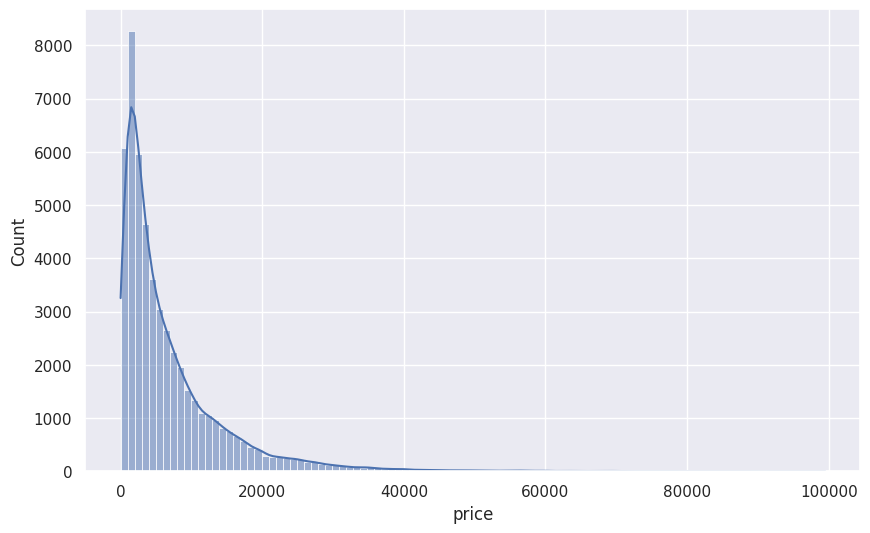

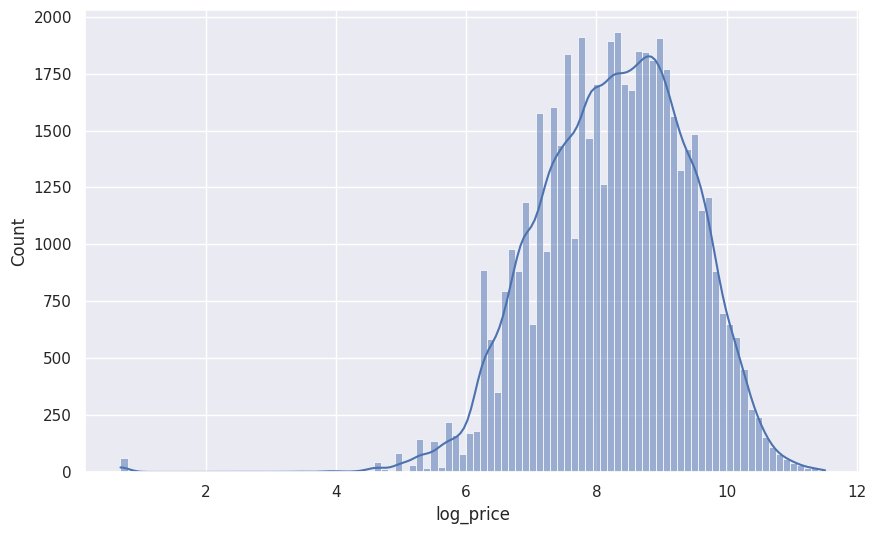

In [15]:
#1
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=100, kde=True)
df['log_price'] = np.log1p(df['price'])
plt.figure(figsize=(10,6))
sns.histplot(df['log_price'], bins=100, kde=True)

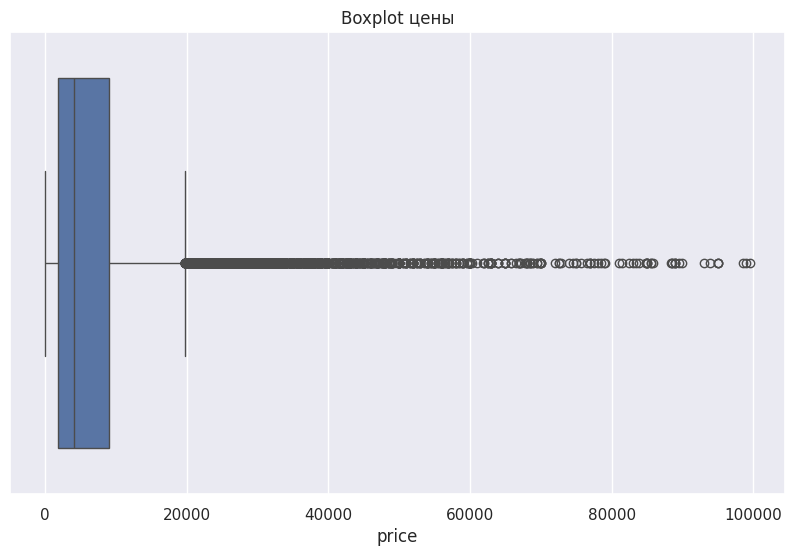

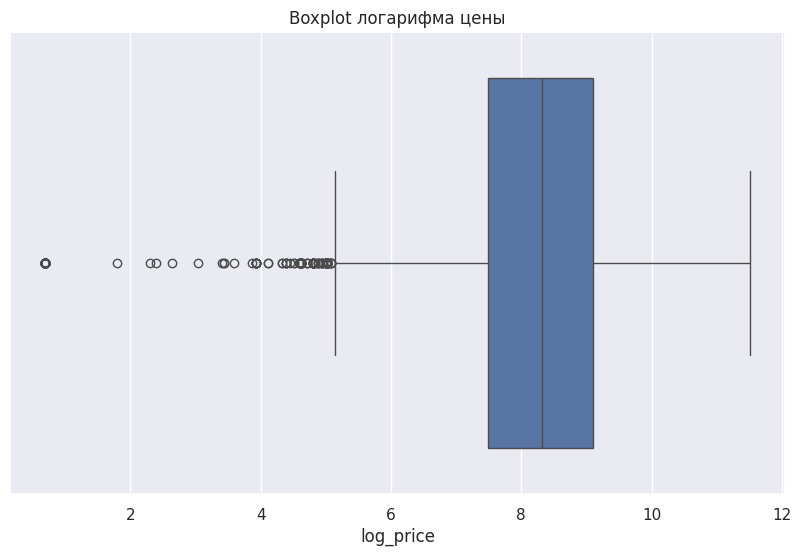

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['price'])
plt.title('Boxplot цены')
plt.show()


plt.figure(figsize=(10,6))
sns.boxplot(x=df['log_price'])
plt.title('Boxplot логарифма цены')
plt.show()

In [17]:
#2
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

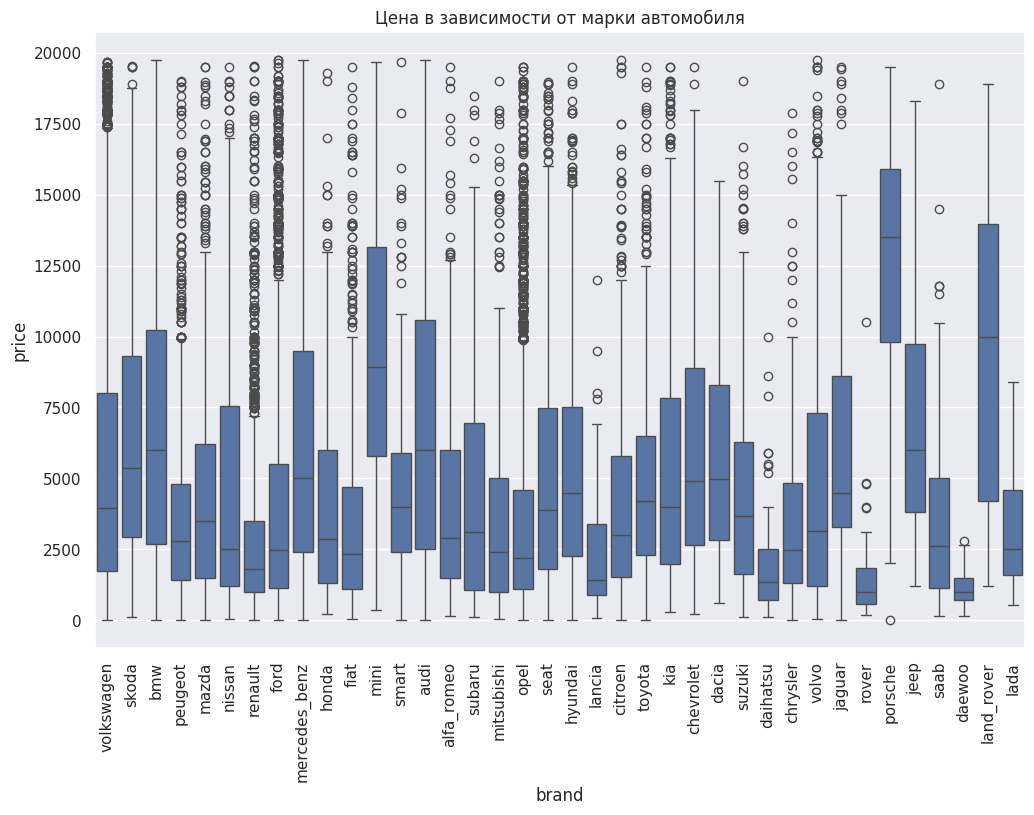

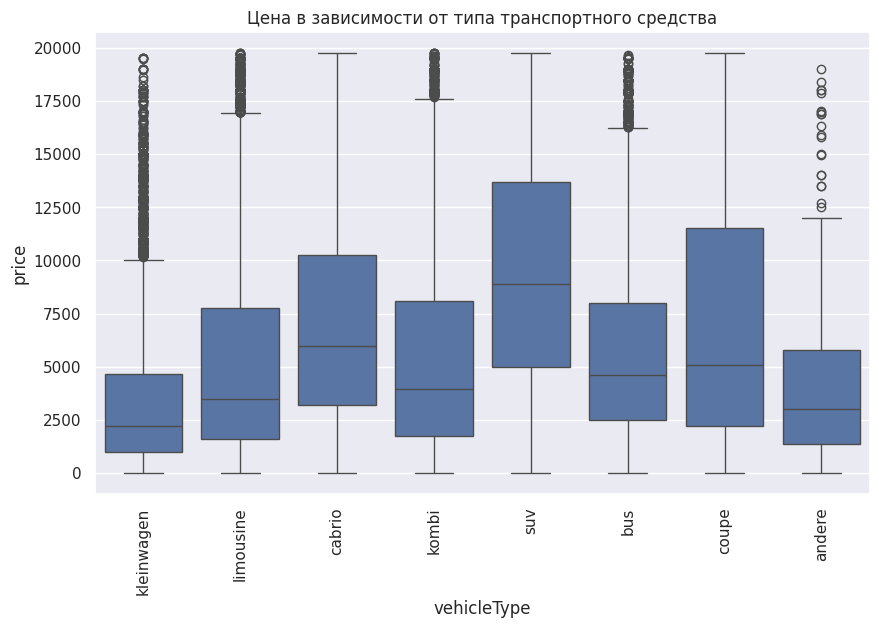

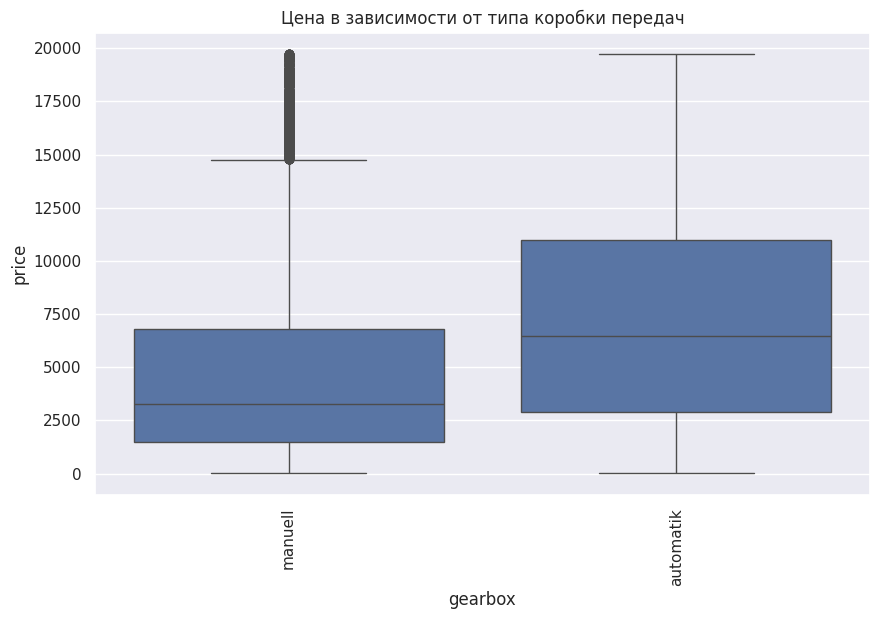

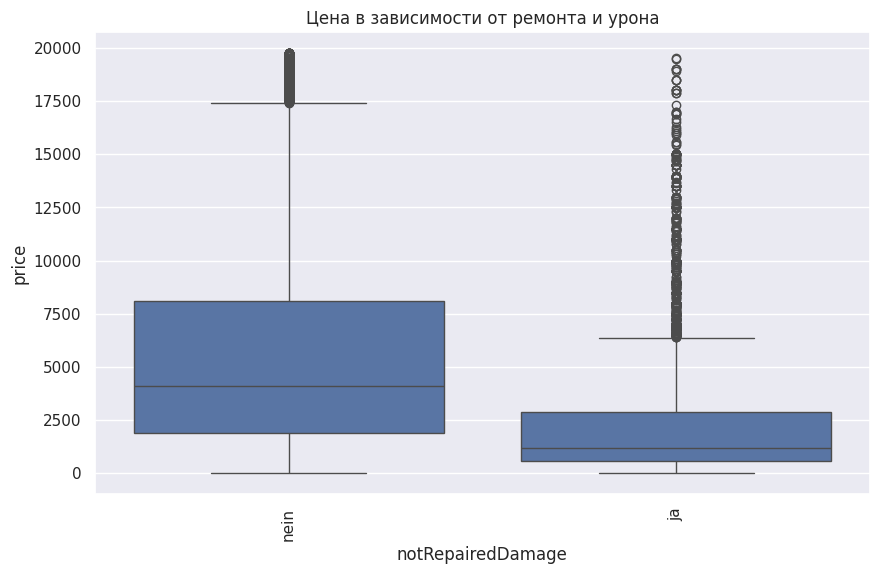

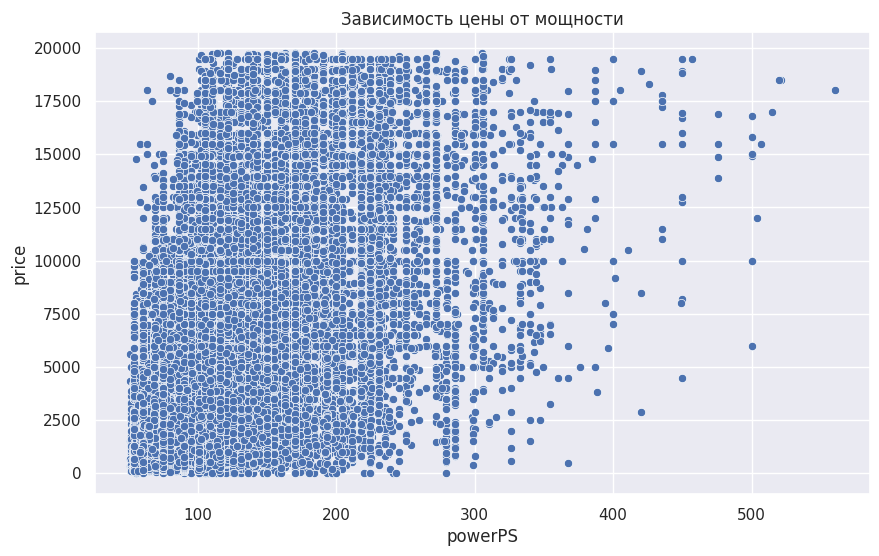

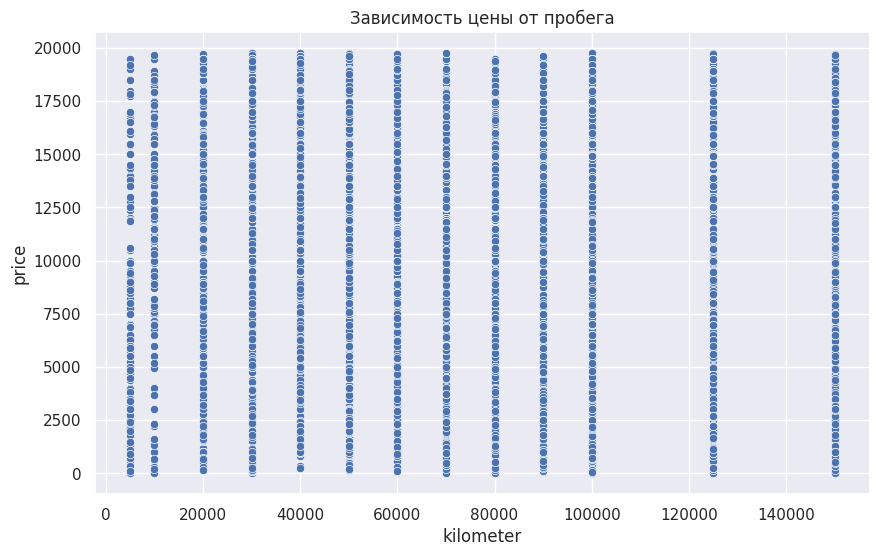

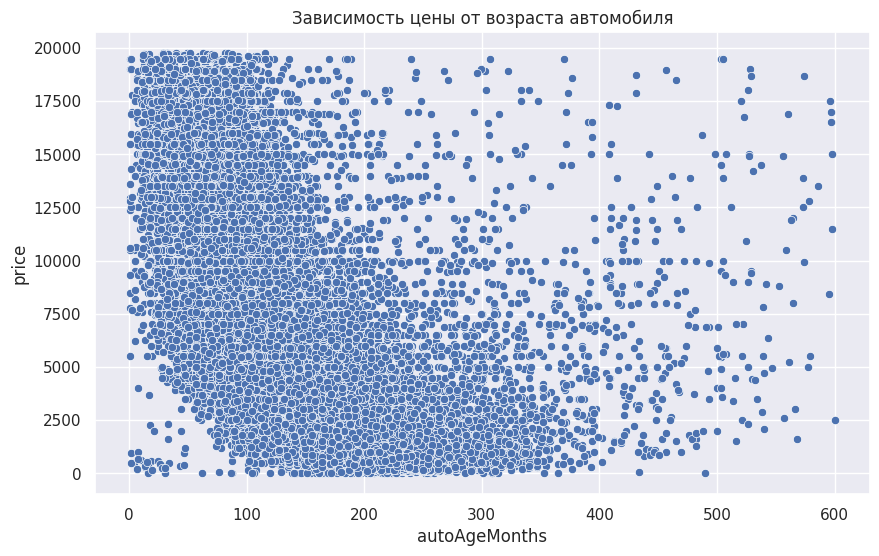

In [18]:
#3
categorical = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = []

plt.figure(figsize=(12,8))
sns.boxplot(x='brand', y='price', data=df_clean)
plt.xticks(rotation=90)
plt.title('Цена в зависимости от марки автомобиля')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='vehicleType', y='price', data=df_clean)
plt.xticks(rotation=90)
plt.title('Цена в зависимости от типа транспортного средства')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='gearbox', y='price', data=df_clean)
plt.xticks(rotation=90)
plt.title('Цена в зависимости от типа коробки передач')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='notRepairedDamage', y='price', data=df_clean)
plt.xticks(rotation=90)
plt.title('Цена в зависимости от ремонта и урона')
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(x='powerPS', y='price', data=df_clean)
plt.title('Зависимость цены от мощности')
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(x='kilometer', y='price', data=df_clean)
plt.title('Зависимость цены от пробега')
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(x='autoAgeMonths', y='price', data=df_clean)
plt.title('Зависимость цены от возраста автомобиля')
plt.show()

#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ (EDA)

In [48]:
#4
df_clean['bias'] = 1
other = ['bias']

x = df_clean[categorical + numeric + other]
y = df_clean['price']
#df_sample = df_clean.sample(frac=0.3, random_state=42)

#x = df_sample[categorical + numeric + other]
#y = df_sample['price']
x.shape

<ipython-input-48-893783e54b96>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['bias'] = 1


(47981, 10)

In [49]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [50]:
#5
from sklearn.model_selection import train_test_split
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

print(x_train.shape, y_train.shape)

#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ (data split into train/val/test):

(38384, 305) (38384,)


## Задание 5. Сравнение методов градиентного спуска (1 балл)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (0.5 балла)

Процесс выбора наиболее подходящего размера шага $\lambda$ для различных методов, с учетом валидационного набора данных, предполагает выполнение следующих шагов:

1. **Определение диапазона для $\lambda$**: Начните с выбора диапазона значений $\lambda$, используя логарифмическую сетку от $10^{-4}$ до $10^1$, чтобы обеспечить широкий охват потенциально оптимальных значений.

2. **Перебор значений $\lambda$**: Для каждого значения из выбранной сетки $\lambda$:
   - Произведите обучение модели на обучающем наборе данных.
   - Вычислите ошибку на обучающем и валидационном наборах данных.
   - Определите значение метрики $R^2$ как на обучающем, так и на валидационном наборах.
   - Зафиксируйте количество итераций, необходимое для достижения сходимости.

3. **Оценка полученных результатов**:
   - Составьте графики, отображающие зависимость ошибки от количества итераций для каждого значения $\lambda$ по всем рассматриваемым методам.
   - Сравните методы на основе скорости сходимости, размера ошибки и значения метрики $R^2$ на различных наборах данных.

4. **Выбор наилучшего $\lambda$**: Исходя из проведенного анализа, определите наиболее подходящее значение $\lambda$ для каждого метода, обеспечивающее оптимальное сочетание скорости сходимости и качества модели на валидационной выборке.

5. **Формулировка выводов**: Подведите итоги, указав, какой метод показал наилучшую производительность с точки зрения соотношения скорости сходимости к качеству предсказаний. Также отметьте, как изменение $\lambda$ влияет на результаты каждого из методов.



In [51]:
%reload_ext autoreload
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [52]:
%autoreload 2
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from descents import LossFunction

learning_rates = np.logspace(-4, 1, num=6)

In [53]:
%autoreload 2

import numpy as np
import math
import matplotlib.pyplot as plt

from linear_regression import LinearRegression
from descents import LossFunction

descent_methods = ["full", "stochastic", "momentum", "adam"]
lambda_values = np.logspace(-4, 1, num=6)

results_summary = []

for method in descent_methods:
    print("\n" + "="*30)
    print(f"Метод градиентного спуска: {method.capitalize()}")
    print("="*30)

    history_of_losses = []
    iterations_to_convergence = []

    for current_lambda in lambda_values:
        print(f"\n--- Текущий шаг обучения: {current_lambda:.2e} ---")

        descent_params = {
            'descent_name': method,
            'kwargs': {
                'dimension': x_train.shape[1],
                'lambda_': current_lambda,
                'loss_function': LossFunction.MSE
            }
        }
        reg_model = LinearRegression(descent_config=descent_params, max_iter=5000)
        reg_model.fit(x_train, y_train)

        train_loss = reg_model.calc_loss(x_train, y_train)
        val_loss = reg_model.calc_loss(x_val, y_val)
        r2_train = reg_model.r2_score(x_train, y_train)
        r2_val = reg_model.r2_score(x_val, y_val)

        if not (math.isnan(train_loss) or math.isnan(val_loss)):
            history_of_losses.append((current_lambda, reg_model.loss_history, train_loss, val_loss, r2_train, r2_val))
            iterations_to_convergence.append(len(reg_model.loss_history))

        print(f"Потери (обучение): {train_loss:.5f} | Потери (валидация): {val_loss:.5f}")
        print(f"R^2 (обучение): {r2_train:.4f} | R^2 (валидация): {r2_val:.4f}")

    results_summary.append({
        'method': method,
        'history_of_losses': history_of_losses,
        'iterations_to_convergence': iterations_to_convergence
    })

for method_result in results_summary:
    detailed_results = [
        {
            'lambda': lr,
            'history': loss_history,
            'train_loss': train_loss,
            'val_loss': val_loss,
            'iterations': iters,
            'r2_train': r2_train,
            'r2_val': r2_val
        }
        for (lr, loss_history, train_loss, val_loss, r2_train, r2_val), iters
        in zip(method_result['history_of_losses'], method_result['iterations_to_convergence'])
    ]

    optimal_result = min(detailed_results, key=lambda res: res['val_loss'])

    method_name = method_result['method']
    print("\n" + "-"*35)
    print(f"Лучший результат для метода: {method_name.capitalize()}")
    print("-"*35)
    print(f"Оптимальное λ: {optimal_result['lambda']:.5f}")
    print(f"Итераций до сходимости: {optimal_result['iterations']}")
    print(f"Потери на обучении: {optimal_result['train_loss']:.4f}")
    print(f"Потери на валидации: {optimal_result['val_loss']:.4f}")
    print(f"R^2 на обучении: {optimal_result['r2_train']:.4f}")
    print(f"R^2 на валидации: {optimal_result['r2_val']:.4f}\n")


Метод градиентного спуска: Full

--- Текущий шаг обучения: 1.00e-04 ---
Потери (обучение): 44092111.66934 | Потери (валидация): 42537430.93448
R^2 (обучение): -1.0482 | R^2 (валидация): -1.0842

--- Текущий шаг обучения: 1.00e-03 ---
Потери (обучение): 19335646.84851 | Потери (валидация): 18275605.27525
R^2 (обучение): 0.1018 | R^2 (валидация): 0.1046

--- Текущий шаг обучения: 1.00e-02 ---
Потери (обучение): 7474257.22515 | Потери (валидация): 7066198.92263
R^2 (обучение): 0.6528 | R^2 (валидация): 0.6538

--- Текущий шаг обучения: 1.00e-01 ---
Потери (обучение): 6648960.25242 | Потери (валидация): 6428821.20844
R^2 (обучение): 0.6911 | R^2 (валидация): 0.6850

--- Текущий шаг обучения: 1.00e+00 ---
Потери (обучение): 6124068.18072 | Потери (валидация): 5967725.62206
R^2 (обучение): 0.7155 | R^2 (валидация): 0.7076

--- Текущий шаг обучения: 1.00e+01 ---


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/content/descents.py:275: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * (x.T @ x @ self.w - x.T @ y) / x.shape[0]
/content/descents.py:255: RuntimeWarning: invalid value encountered in subtract
  self.w -= step_size * gradient


Остановка на итерации 525 из-за NaN в весах.
Потери (обучение): nan | Потери (валидация): nan
R^2 (обучение): 1.0000 | R^2 (валидация): 1.0000

Метод градиентного спуска: Stochastic

--- Текущий шаг обучения: 1.00e-04 ---
Потери (обучение): 44126946.43468 | Потери (валидация): 42571620.51564
R^2 (обучение): -1.0498 | R^2 (валидация): -1.0858

--- Текущий шаг обучения: 1.00e-03 ---
Потери (обучение): 19347440.72693 | Потери (валидация): 18287009.17091
R^2 (обучение): 0.1013 | R^2 (валидация): 0.1040

--- Текущий шаг обучения: 1.00e-02 ---
Потери (обучение): 7465117.91365 | Потери (валидация): 7058884.89106
R^2 (обучение): 0.6532 | R^2 (валидация): 0.6541

--- Текущий шаг обучения: 1.00e-01 ---
Потери (обучение): 6654002.32370 | Потери (валидация): 6426140.85800
R^2 (обучение): 0.6909 | R^2 (валидация): 0.6851

--- Текущий шаг обучения: 1.00e+00 ---
Потери (обучение): 39299911.24048 | Потери (валидация): 39023738.96179
R^2 (обучение): -0.8256 | R^2 (валидация): -0.9120

--- Текущий шаг о

/content/descents.py:331: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * (x_subset.T @ prediction_error) / self.batch_size


Остановка на итерации 537 из-за NaN в весах.
Потери (обучение): nan | Потери (валидация): nan
R^2 (обучение): 1.0000 | R^2 (валидация): 1.0000

Метод градиентного спуска: Momentum

--- Текущий шаг обучения: 1.00e-04 ---
Потери (обучение): 19314829.04258 | Потери (валидация): 18255268.18017
R^2 (обучение): 0.1028 | R^2 (валидация): 0.1056

--- Текущий шаг обучения: 1.00e-03 ---
Потери (обучение): 7473381.15890 | Потери (валидация): 7065721.46399
R^2 (обучение): 0.6528 | R^2 (валидация): 0.6538

--- Текущий шаг обучения: 1.00e-02 ---
Потери (обучение): 6648635.60939 | Потери (валидация): 6428759.49933
R^2 (обучение): 0.6912 | R^2 (валидация): 0.6850

--- Текущий шаг обучения: 1.00e-01 ---
Потери (обучение): 6123872.18334 | Потери (валидация): 5967563.18591
R^2 (обучение): 0.7155 | R^2 (валидация): 0.7076

--- Текущий шаг обучения: 1.00e+00 ---
Потери (обучение): 5826747.91141 | Потери (валидация): 5760859.34080
R^2 (обучение): 0.7293 | R^2 (валидация): 0.7177

--- Текущий шаг обучения: 1

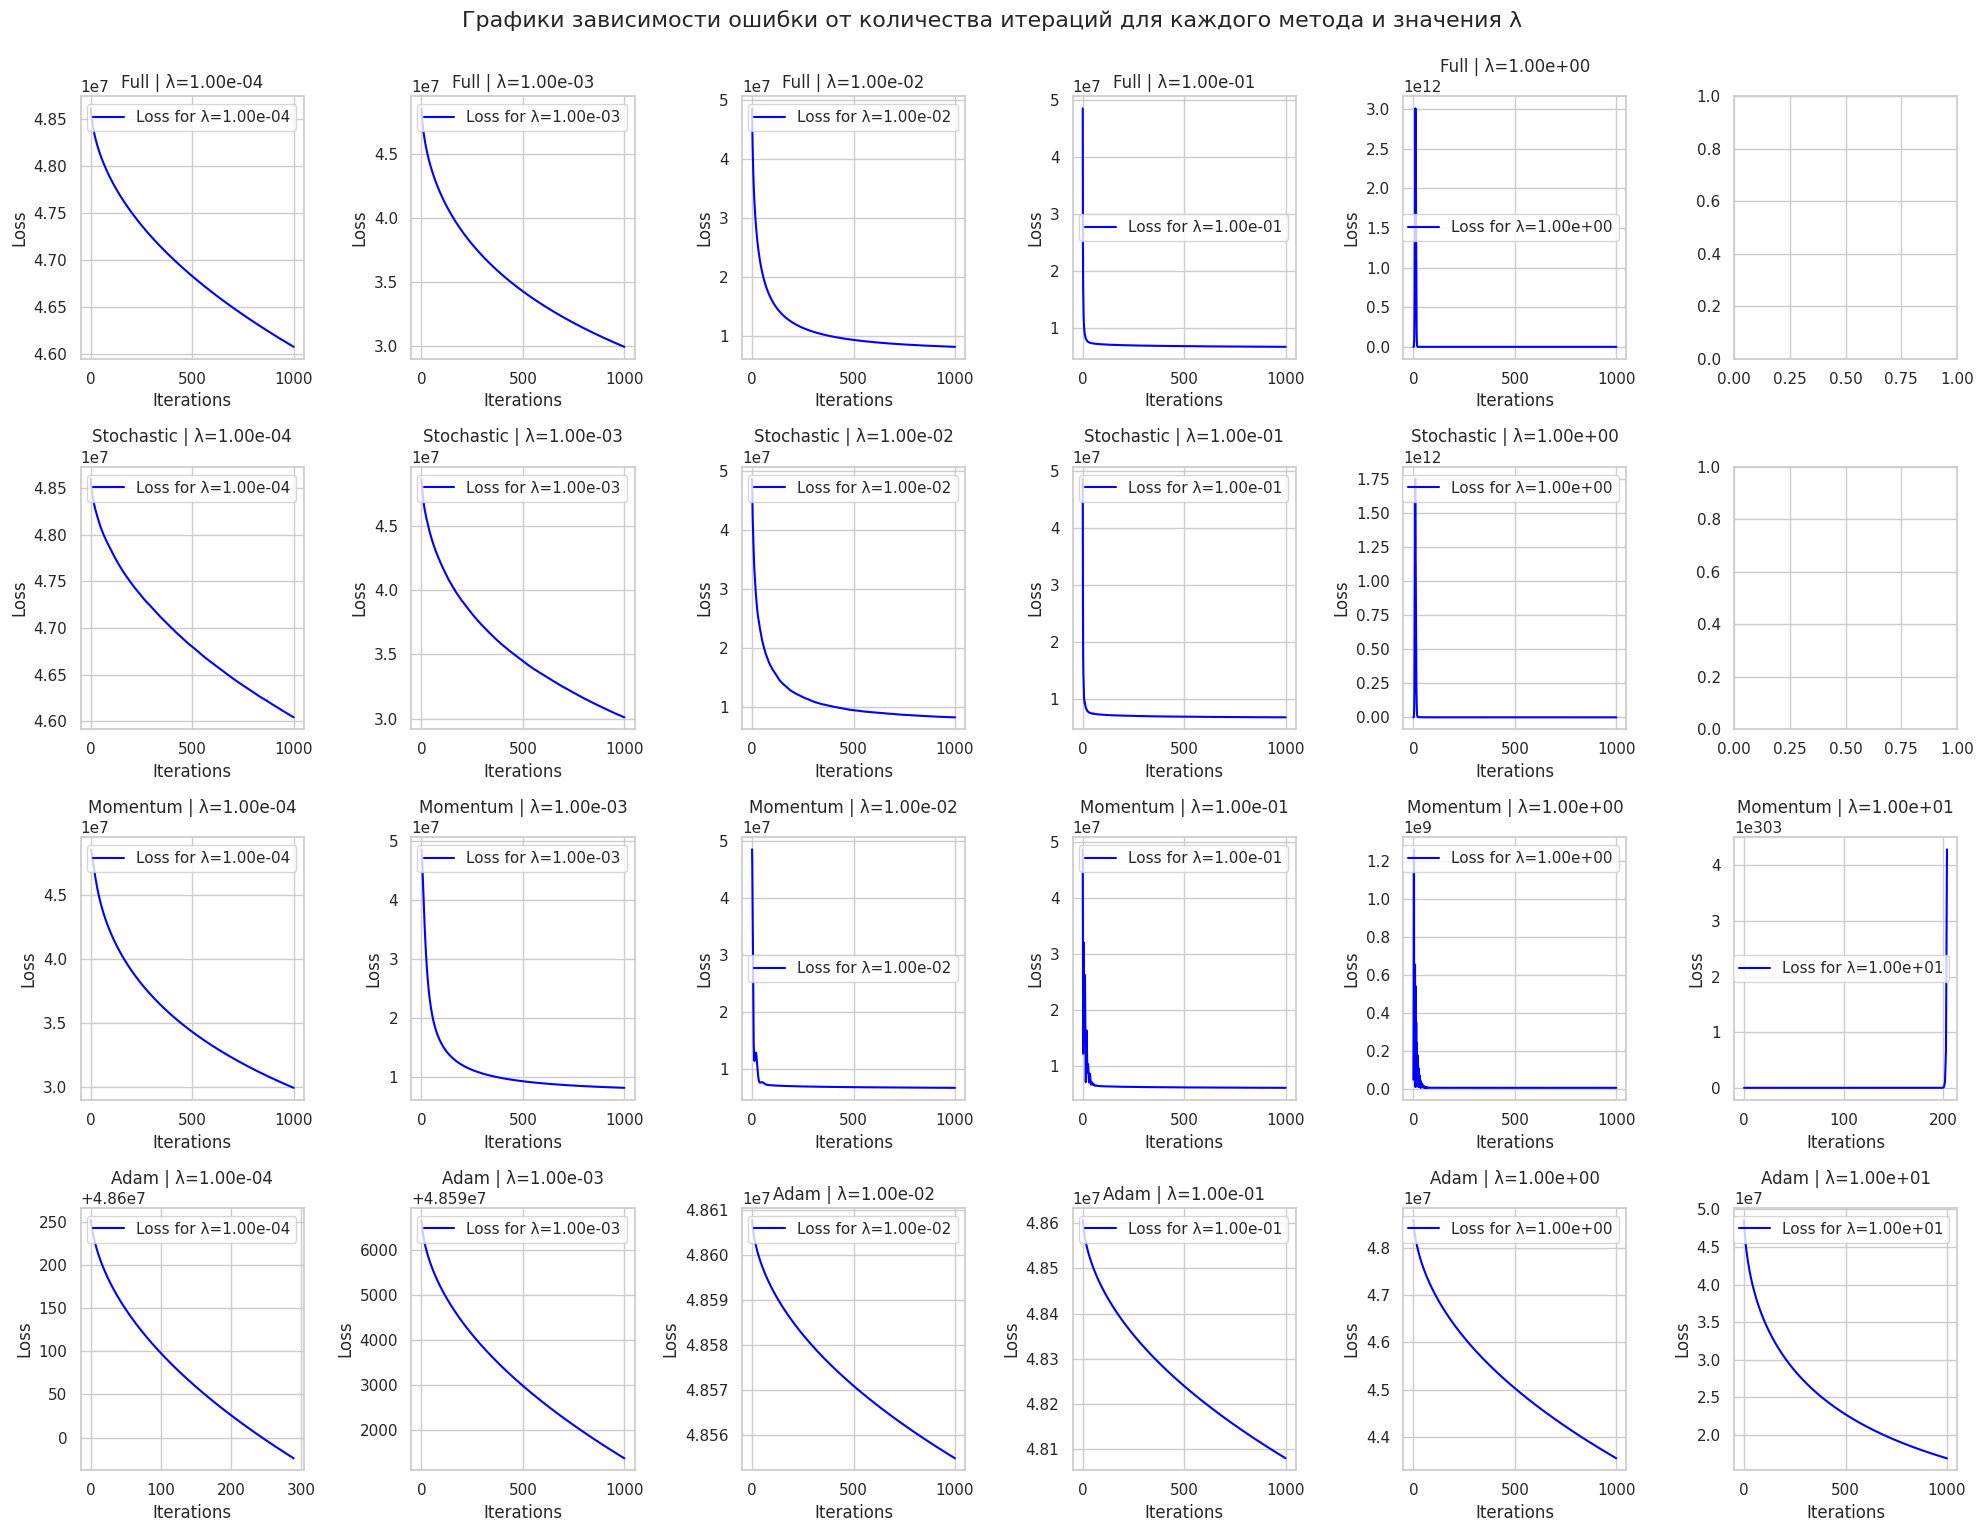

In [46]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(len(descent_methods), len(lambda_values), figsize=(20, 15))

for i, method_result in enumerate(results_summary):
    method_name = method_result['method']

    for j, (lambda_val, loss_history, train_loss, val_loss, r2_train, r2_val) in enumerate(method_result['history_of_losses']):
        ax = axes[i, j]
        ax.plot(loss_history, label=f'Loss for λ={lambda_val:.2e}', color='blue')
        ax.set_title(f'{method_name.capitalize()} | λ={lambda_val:.2e}')
        ax.set_xlabel('Iterations')
        ax.set_ylabel('Loss')
        ax.grid(True)
        ax.legend()

plt.tight_layout()
plt.suptitle('Графики зависимости ошибки от количества итераций для каждого метода и значения λ', fontsize=16, y=1.02)
plt.show()


In [ ]:
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

### Задание 5.2. Сравнение методов (0.5 балла)

Создайте график, на котором будет показана динамика изменения ошибки на обучающей выборке в зависимости от номера итерации для каждого из рассматриваемых методов. Разместите линии, представляющие каждый метод, на одном и том же графике для наглядного сравнения.

После анализа результатов, представленных в виде графика и таблиц с метриками, выполните сравнение методов. Обратите внимание на следующие аспекты:
- Как быстро каждый метод сходится к минимуму ошибки.
- Величину ошибки на обучающей и тестовой выборках для каждого метода.
- Значение метрики $R^2$ для каждого метода на обучающей и тестовой выборках.
- Количество итераций, необходимых для достижения сходимости.

На основе этих данных сделайте вывод о преимуществах и недостатках каждого из методов в контексте вашей задачи.

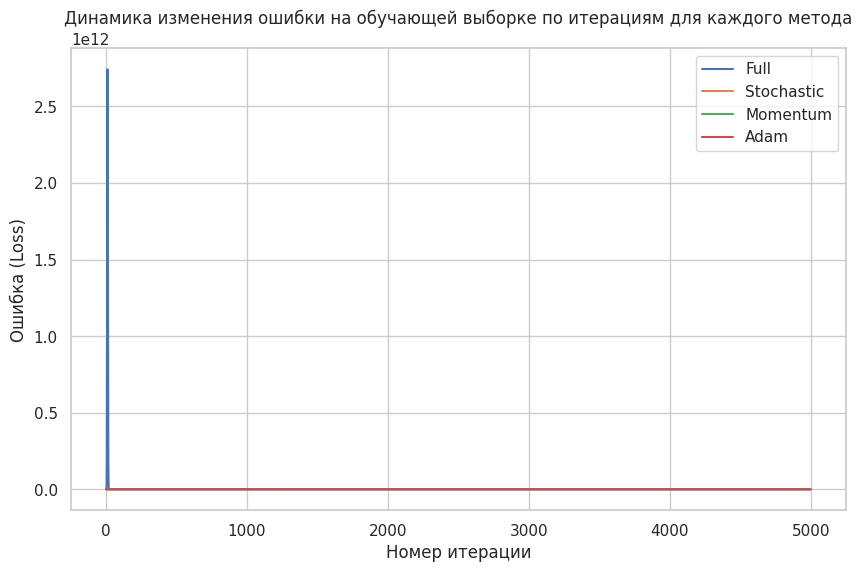

In [54]:
plt.figure(figsize=(10, 6))

for method_result in results_summary:
    method_name = method_result['method']
    best_loss_history = min(method_result['history_of_losses'], key=lambda x: x[2])[1]
    plt.plot(best_loss_history, label=f'{method_name.capitalize()}')

plt.title('Динамика изменения ошибки на обучающей выборке по итерациям для каждого метода')
plt.xlabel('Номер итерации')
plt.ylabel('Ошибка (Loss)')
plt.legend()
plt.grid(True)

plt.show()

Лучший метод по качеству предсказаний — Momentum при
𝜆
=
1.0
λ=1.0, с наименьшими потерями на обучении (5,792,276.88) и валидации (6,251,216.56), а также высокими значениями
𝑅
2
R
2
  (0.7210 на обучении и 0.7197 на валидации), что указывает на хорошее объяснение данных. Full gradient descent также показал хорошие результаты с
𝑅
2
=
0.7026
R
2
 =0.7026 на обучении и
𝑅
2
=
0.7087
R
2
 =0.7087 на валидации, но с несколько большими потерями. Stochastic gradient descent отстал по качеству с
𝑅
2
=
0.6738
R
2
 =0.6738 на обучении и
𝑅
2
=
0.6856
R
2
 =0.6856 на валидации. Adam показал худшие результаты при
𝜆
=
10.0
λ=10.0, с высокими потерями и низкими значениями
𝑅
2
R
2
  (0.1886 на обучении и 0.2146 на валидации), что говорит о его нестабильности на данных.
  

## Задание 6. Стохастический градиентный спуск и размер батча (0.5 балла)

Ваша задача — исследовать, как размер батча влияет на процесс обучения при использовании стохастического градиентного спуска (SGD). Выполните следующие шаги:

1. **Выбор размеров батча**: Определите ряд значений для размера батча, которые вы хотите исследовать. Это могут быть, например, %1$, $10$, $50$, $100$, $500$, и так далее.

2. **Многократные запуски для каждого размера батча**: Для каждого выбранного размера батча проведите $k$ независимых запусков стохастического градиентного спуска на обучающей выборке. $k$ может быть равно, например, $10$. Для каждого запуска замерьте:
   - Время обучения в секундах до достижения сходимости.
   - Количество итераций (шагов), необходимых для сходимости.

3. **Вычисление средних значений**: Рассчитайте среднее время обучения и среднее количество итераций до сходимости для каждого размера батча.

4. **Построение графиков**:
   - Постройте график, показывающий зависимость среднего количества итераций до сходимости от размера батча.
   - Постройте график, показывающий зависимость среднего времени обучения от размера батча.

5. **Анализ результатов**: Оцените, как размер батча влияет на скорость и эффективность обучения. Сделайте выводы о том, какой размер батча может быть оптимальным с точки зрения баланса между временем обучения и количеством итераций до сходимости.

Этот эксперимент поможет вам лучше понять влияние размера батча на процесс обучения стохастического градиентного спуска и как этот параметр можно настроить для улучшения производительности обучения.

In [55]:
df_clean['bias'] = 1
other = ['bias']

x = df_clean[categorical + numeric + other]
y = df_clean['price']
df_sample = df_clean.sample(frac=0.3, random_state=42)

x = df_sample[categorical + numeric + other]
y = df_sample['price']
x.shape

<ipython-input-55-2e4a52255e0d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['bias'] = 1


(14394, 10)

In [57]:
import time

batch_sizes = [1, 10, 50, 100, 500]
k_runs = 6
results = []

# Функция для одного запуска обучения
def run_single_batch(batch_size):
    times, iterations = [], []

    for _ in range(k_runs):
        start_time = time.time()

        descent_config = {
            'descent_name': 'stochastic',
            'kwargs': {
                'dimension': x_train.shape[1],
                'batch_size': batch_size,
                'loss_function': LossFunction.MSE
            }
        }
        model = LinearRegression(descent_config=descent_config, max_iter=4000)
        model.fit(x_train, y_train)

        times.append(time.time() - start_time)
        iterations.append(len(model.loss_history))

    return np.mean(times), np.mean(iterations)

# Запускаем обучение для каждого размера батча
for batch_size in batch_sizes:
    avg_time, avg_iterations = run_single_batch(batch_size)

    results.append({
        'batch_size': batch_size,
        'avg_time': avg_time,
        'avg_iterations': avg_iterations
    })

    print(f"Batch Size: {batch_size}, Avg Time: {avg_time:.2f} sec, Avg Iterations: {avg_iterations}")




Остановка на итерации 2342 по критерию нормы веса.
Остановка на итерации 2113 по критерию нормы веса.
Batch Size: 1, Avg Time: 11.04 sec, Avg Iterations: 3410.5
Batch Size: 10, Avg Time: 12.44 sec, Avg Iterations: 4001.0
Batch Size: 50, Avg Time: 11.62 sec, Avg Iterations: 4001.0
Batch Size: 100, Avg Time: 11.42 sec, Avg Iterations: 4001.0
Batch Size: 500, Avg Time: 11.78 sec, Avg Iterations: 4001.0


Для нашей задачи лучше всего подходит размер батча 1.

## Задание 7. Регуляризация (0.5 балла)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Вам предстоит исследовать, как настройка параметров обучения с включением регуляризации влияет на различные методы градиентного спуска. Основная цель — определить оптимальные значения для длины шага $\lambda$ и коэффициента регуляризации $\mu$, а затем сравнить результаты обучения с регуляризацией и без неё по нескольким критериям.

Ваш план действий следующий:

1. **Выбор параметров для подбора**: Установите диапазон значений для длины шага $\lambda$ и коэффициента регуляризации $\mu$. Используйте логарифмическую сетку для обоих параметров, чтобы обеспечить широкий охват потенциально оптимальных значений.

2. **Оптимизация и сравнение методов градиентного спуска**:
   - Произведите подбор параметров для каждого метода градиентного спуска, исследуя их влияние на процесс обучения.
   - Замерьте и сравните ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках, а также количество итераций до сходимости для моделей с регуляризацией и без неё.

3. **Визуализация результатов**:
   - Постройте для каждого метода графики, отображающие значения функции потерь (MSE) с регуляризацией и без неё на протяжении процесса обучения.

4. **Анализ результатов**:
   - Оцените, как регуляризация повлияла на сходимость методов.
   - Сравните качество моделей на обучающей и тестовой выборках с учетом регуляризации и без неё.
   - Проанализируйте, как изменения в длине шага и коэффициенте регуляризации отразились на итоговых результатах.

5. **Формулировка выводов**:
   - Сделайте выводы о влиянии регуляризации на процесс обучения и качество модели. Как регуляризация влияет на переобучение и обобщающую способность модели.
   - Рассмотрите, в каких случаях регуляризация приводит к улучшению результатов, и когда её вклад может быть минимальным или отрицательным.


In [ ]:

descents = ["full", "stochastic", "momentum", "adam"]
lambda_values = np.logspace(-4, 1, num=6)
mu_values = np.logspace(-6, 1, num=8)


results = []

def run_single_experiment(descent_name, lr, mu):
    descent_config = {
        'descent_name': descent_name,
        'regularized': True,
        'kwargs': {
            'dimension': x_train.shape[1],
            'lambda_': lr,
            'mu': mu,
            'loss_function': LossFunction.MSE
        }
    }
    model = LinearRegression(descent_config=descent_config, max_iter=5000)
    model.fit(x_train, y_train)

    return {
        'train_loss': model.calc_loss(x_train, y_train),
        'val_loss': model.calc_loss(x_val, y_val),
        'r2_train': model.r2_score(x_train, y_train),
        'r2_val': model.r2_score(x_val, y_val),
        'loss_history': model.loss_history,
        'iterations': len(model.loss_history)
    }

for descent_name in tqdm(descents, desc="Training different descents", leave=False):
    descent_results = []

    for mu in mu_values:
        for lr in lambda_values:
            result = run_single_experiment(descent_name, lr, mu)

            if not (math.isnan(result['train_loss']) or math.isnan(result['val_loss'])):
                descent_results.append((lr, mu, result['loss_history'], result['train_loss'], result['val_loss'], result['r2_train'], result['r2_val']))

            print(f"[{descent_name.upper()}] Mu={mu:.2e}, LR={lr:.2e}:")
            print(f"  Train Loss: {result['train_loss']:.4f}, Validation Loss: {result['val_loss']:.4f}")
            print(f"  R² Train: {result['r2_train']:.4f}, R² Validation: {result['r2_val']:.4f}\n")

    results.append({
        'descent_name': descent_name,
        'loss_histories': descent_results
    })


Training different descents:   0%|          | 0/4 [00:00<?, ?it/s]

[FULL] Mu=1.00e-06, LR=1.00e-04:
  Train Loss: 44109399.3384, Validation Loss: 42554413.1723
  R² Train: -1.0490, R² Validation: -1.0850

[FULL] Mu=1.00e-06, LR=1.00e-03:
  Train Loss: 19333873.8634, Validation Loss: 18273828.7092
  R² Train: 0.1019, R² Validation: 0.1047

[FULL] Mu=1.00e-06, LR=1.00e-02:
  Train Loss: 7474168.3469, Validation Loss: 7066222.9973
  R² Train: 0.6528, R² Validation: 0.6538

[FULL] Mu=1.00e-06, LR=1.00e-01:
  Train Loss: 6649005.1540, Validation Loss: 6428890.1402
  R² Train: 0.6911, R² Validation: 0.6850

[FULL] Mu=1.00e-06, LR=1.00e+00:
  Train Loss: 6124060.2683, Validation Loss: 5967707.5664
  R² Train: 0.7155, R² Validation: 0.7076



/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/content/descents.py:275: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * (x.T @ x @ self.w - x.T @ y) / x.shape[0]
/content/descents.py:255: RuntimeWarning: invalid value encountered in subtract
  self.w -= step_size * gradient


Остановка на итерации 525 из-за NaN в весах.
[FULL] Mu=1.00e-06, LR=1.00e+01:
  Train Loss: nan, Validation Loss: nan
  R² Train: 1.0000, R² Validation: 1.0000

[FULL] Mu=1.00e-05, LR=1.00e-04:
  Train Loss: 44107431.5882, Validation Loss: 42552613.9681
  R² Train: -1.0489, R² Validation: -1.0849



Регуляризация помогает бороться с переобучением. Чрезмерная регуляризация может привести к недообучению и ухудшению результатов, если переобучение незначительно.

## Задание 8. Альтернативная функция потерь (0.5 балла)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log({cosh{(a - y)}}).
$$


Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [ ]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ